In [ ]:
# In Pandas a Series whose index consists of dates/times is a time series.

In [1]:
import pandas as pd

In [3]:
wh = pd.read_csv("https://raw.githubusercontent.com/csmastersUH/data_analysis_with_python_2020/master/kumpula-weather-2017.csv")

In [4]:
wh3 = wh.rename(columns={"m": "Month", "d": "Day", "Precipitation amount (mm)" : "Precipitation",
                         "Snow depth (cm)" : "Snow", "Air temperature (degC)" : "Temperature"})
wh3.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8


In [5]:
wh2 = wh3.copy()
wh2.columns

Index(['Year', 'Month', 'Day', 'Time', 'Time zone', 'Precipitation', 'Snow',
       'Temperature'],
      dtype='object')

In [6]:
wh2["Date"] = pd.to_datetime(wh2[["Year", "Month", "Day"]])
wh2.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature,Date
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6,2017-01-01
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9,2017-01-02
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5,2017-01-03
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8,2017-01-04
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8,2017-01-05


In [7]:
# dropping the useless fields
wh2 = wh2.drop(columns=["Year", "Month", "Day"])
wh2.head()

,Time,Time zone,Precipitation,Snow,Temperature,Date
0,00:00,UTC,-1.0,-1.0,0.6,2017-01-01
1,00:00,UTC,4.4,-1.0,-3.9,2017-01-02
2,00:00,UTC,6.6,7.0,-6.5,2017-01-03
3,00:00,UTC,-1.0,13.0,-12.8,2017-01-04
4,00:00,UTC,-1.0,10.0,-17.8,2017-01-05


In [8]:
# Setting Date field as the index of the DataFrame
wh2 = wh2.set_index("Date")
wh2.head()

,Time,Time zone,Precipitation,Snow,Temperature
Date,,,,,
2017-01-01,00:00,UTC,-1.0,-1.0,0.6
2017-01-02,00:00,UTC,4.4,-1.0,-3.9
2017-01-03,00:00,UTC,6.6,7.0,-6.5
2017-01-04,00:00,UTC,-1.0,13.0,-12.8
2017-01-05,00:00,UTC,-1.0,10.0,-17.8


In [9]:
# getting a set of rows using date slices
wh2["2017-01-15":"2017-02-03"]

,Time,Time zone,Precipitation,Snow,Temperature
Date,,,,,
2017-01-15,00:00,UTC,-1.0,8.0,-2.8
2017-01-16,00:00,UTC,-1.0,8.0,-4.2
2017-01-17,00:00,UTC,0.2,8.0,-3.5
2017-01-18,00:00,UTC,0.9,8.0,1.1
2017-01-19,00:00,UTC,-1.0,5.0,1.6
2017-01-20,00:00,UTC,0.3,5.0,-0.6
2017-01-21,00:00,UTC,0.4,5.0,-1.8
2017-01-22,00:00,UTC,0.2,5.0,1.0
2017-01-23,00:00,UTC,0.1,6.0,0.1


In [10]:
# Getting all the Mondays of July with data_range function
r = pd.date_range("2017-07-01", "2017-07-31", freq="w-mon")
r

DatetimeIndex(['2017-07-03', '2017-07-10', '2017-07-17', '2017-07-24',
               '2017-07-31'],
              dtype='datetime64[ns]', freq='W-MON')

In [11]:
# lenght = (365 - all the mondays at july) = 360
wh2.index.difference(r)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=360, freq=None)

In [12]:
wh2.loc[r,:]

,Time,Time zone,Precipitation,Snow,Temperature
2017-07-03,00:00,UTC,2.2,-1.0,14.5
2017-07-10,00:00,UTC,-1.0,-1.0,18.0
2017-07-17,00:00,UTC,2.7,-1.0,15.4
2017-07-24,00:00,UTC,-1.0,-1.0,15.7
2017-07-31,00:00,UTC,0.1,-1.0,17.8


In [15]:
# freq "b" = business days (mon - fri)
pd.date_range("2017-07-01", "2017-07-31", freq="b")

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21', '2017-07-24',
               '2017-07-25', '2017-07-26', '2017-07-27', '2017-07-28',
               '2017-07-31'],
              dtype='datetime64[ns]', freq='B')

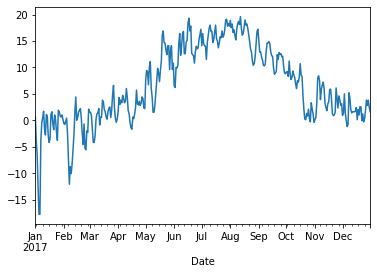

In [17]:
%matplotlib inline
wh2["Temperature"].plot()

In [18]:
# Taking averages over a sliding window of length 30 days
rolling = wh2.Temperature.rolling(30, center=True)
rolling

Rolling [window=30,center=True,axis=0]

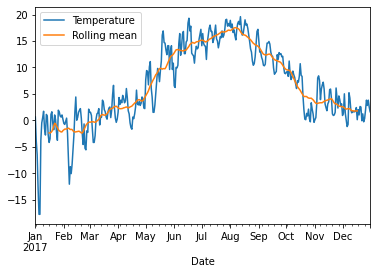

In [19]:
data = pd.DataFrame({"Temperature" : wh2.Temperature, "Rolling mean" : rolling.mean()})
data.plot()

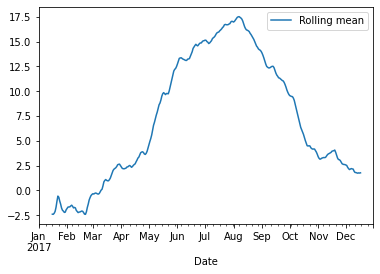

In [20]:
data2 = pd.DataFrame({"Rolling mean" : rolling.mean()})
data2.plot()